### ICA

Como seleccionar la cantidad de componentes de ICA y como seleccionar el canal en el cual están los pestañeos.

Pasos a seguir:

- Reemplazar por señales sintéticas con seno y coseno como las del ejemplo.
- Volver a aplicar lo que hace el ejemplo de la matriz inversa con mne row.plot 10 segundos
- Espero que al aplicar ICA separe las fuentes.
- Partir de un lugar en donde ICA me ande a otro lugar donde ICA me ande.
- Poner un canal en cero, inyectar los pestañeos en ese canal


In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from mne.preprocessing import ICA, create_ecg_epochs
from mne.datasets import sample

In [2]:
signals = pd.read_csv('outputs/blinks_only_20210222_2108.csv')

In [3]:
modified_EEG = pd.read_csv('outputs/modified_EEG_20210222_2108.csv')  #modified_EEG_20210109_2039

In [5]:
multiplied_EEG = pd.read_csv('outputs/blinks_multiplied_20210222_2108.csv')

In [6]:
original_EEG = pd.read_csv('data/base_original_cropped.csv')

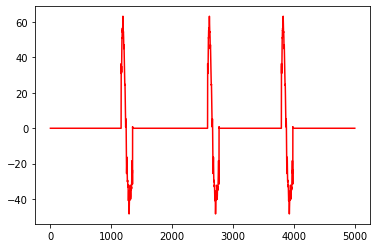

In [7]:
plt.plot(signals[0:5000], color = 'red')

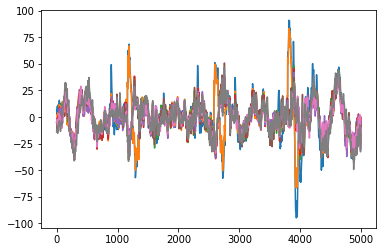

In [8]:
plt.plot(modified_EEG[0:5000])

ICA con 5 componentes
Canal Graficado:  0


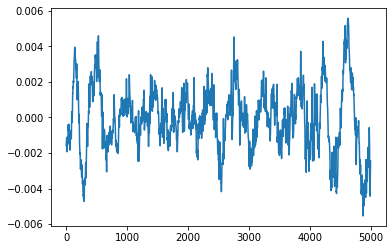

Canal Graficado:  1


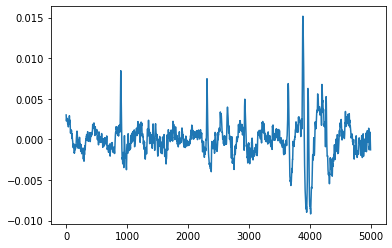

Canal Graficado:  2


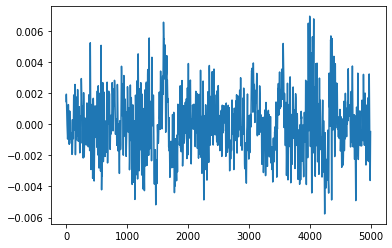

Canal Graficado:  3


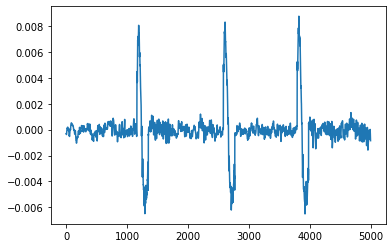

Canal Graficado:  4


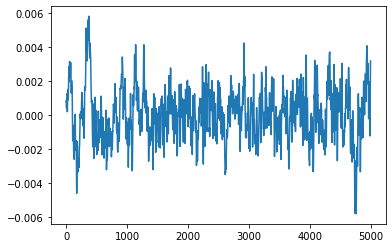

In [9]:
ica = FastICA(n_components = 5 , random_state = 19) 
S_ = ica.fit_transform(modified_EEG) 
A_ = ica.mixing_ 
output_transform = S_.T
print('ICA con 5 componentes')
for canal in range(0, 5):
    print('Canal Graficado: ', canal)
    plt.plot(output_transform[canal,:][0:5000])
    plt.show()

In [10]:
S_.shape

(351771, 5)

Gráfico Pestañeos


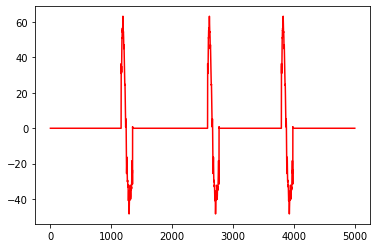

Gráfico EEG


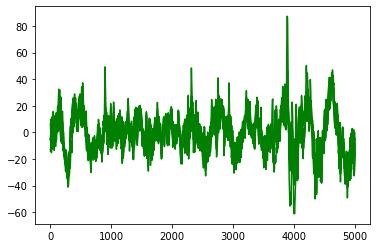

Gráfico EEG con Pestañeos


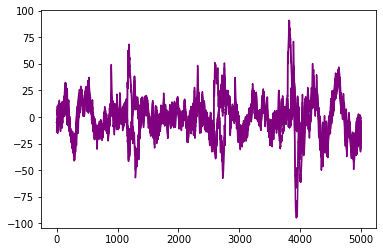

In [11]:
print('Gráfico Pestañeos')
plt.plot(signals[0:5000], color = 'red')
plt.show()
print('Gráfico EEG')
plt.plot(original_EEG[0:5000], color = 'green')
plt.show()
print('Gráfico EEG con Pestañeos')
plt.plot(modified_EEG[0:5000], color = 'purple')
plt.show()

Canal Graficado:  0


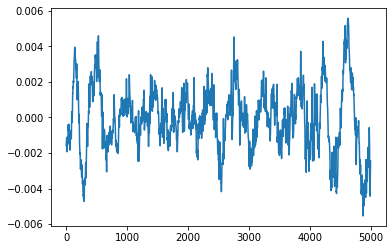

Canal Graficado:  1


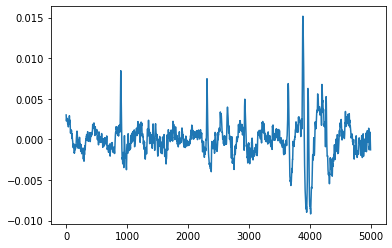

Canal Graficado:  2


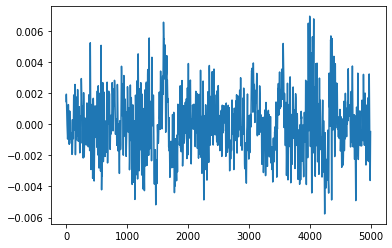

Canal Graficado:  3


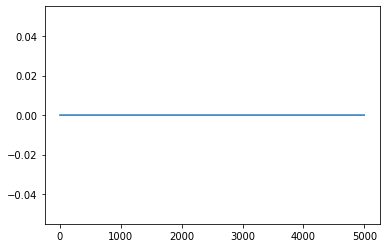

Canal Graficado:  4


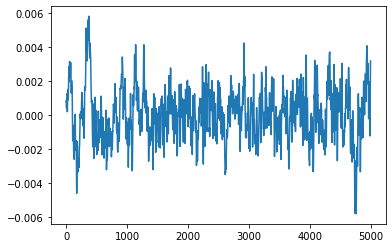

In [12]:
output_transform[3] = np.zeros((351771,))
for canal in range(0, 5):
    print('Canal Graficado: ', canal)
    plt.plot(output_transform[canal,:][0:5000])
    plt.show()

Gráfico EEG con Pestañeos post ICA


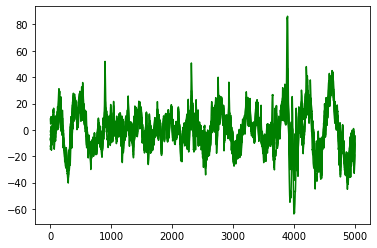

In [13]:
print('Gráfico EEG con Pestañeos post ICA')
plt.plot(np.dot(output_transform.T, A_.T)[0:5000], color = 'green')
plt.show()

Gráfico EEG


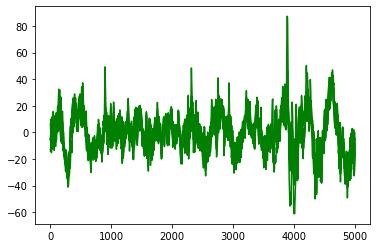

In [14]:
print('Gráfico EEG')
plt.plot(original_EEG[0:5000], color = 'green')
plt.show()

In [ ]:
#assert np.allclose(original_EEG.values, np.dot(output_transform.T, A_.T) + ica.mean_)

In [15]:
np.linalg.norm(original_EEG.values - modified_EEG)

11928.340410758503

In [16]:
np.linalg.norm(original_EEG.values - (np.dot(output_transform.T, A_.T) + ica.mean_))

3778.094041371915

In [17]:
np.linalg.norm(original_EEG.values - multiplied_EEG)

11928340.410758499